In [1]:
from hmmlearn import hmm
import numpy as np
import nltk
from nltk.corpus import brown


In [2]:
nltk.download('brown')
nltk.download('universal_tagset')

[nltk_data] Downloading package brown to /Users/bilal/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package universal_tagset to
[nltk_data]     /Users/bilal/nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!


True

In [3]:
tagged_sentences = brown.tagged_sents(tagset='universal')
print(f"Total sentences: {len(tagged_sentences)}")

tagged_sentences = [[(word.lower(), tag) for (word, tag) in sent]
                    for sent in tagged_sentences]

Total sentences: 57340


In [ ]:
words = set(word.lower() for sent in tagged_sentences for word, tag in sent)
tags = sorted(set(tag for sent in tagged_sentences for word, tag in sent))

word_to_id = {w: i for i, w in enumerate(words)}
id_to_word = {i: w for w, i in word_to_id.items()}

tag_to_id = {t: i for i, t in enumerate(tags)}
id_to_tag = {i: t for t, i in tag_to_id.items()}

print(tags)

['.', 'ADJ', 'ADP', 'ADV', 'CONJ', 'DET', 'NOUN', 'NUM', 'PRON', 'PRT', 'VERB', 'X']


In [ ]:
# X = []
# y = []
# lengths = []

# for sent in tagged_sentences:
#     seq_X = [word_to_id[word.lower()] for word, tag in sent]
#     seq_y = [tag_to_id[tag] for word, tag in sent]
#     X.extend(seq_X)
#     y.extend(seq_y)
#     lengths.append(len(seq_X))

# import numpy as np
# X = np.array(X).reshape(-1, 1)
# y = np.array(y)

In [5]:
from hmmlearn.hmm import CategoricalHMM
n_tags = len(tags)
model = CategoricalHMM(n_components=n_tags, n_iter=1000, verbose=True, random_state=42)

In [ ]:
# model.fit(X, lengths)

In [7]:
import joblib
joblib.dump(model, "hmm_model_partial.pkl")

['hmm_model_partial.pkl']

In [19]:
print("Transition matrix (tag → tag):")
print(model.transmat_)

print("Emission matrix (tag → word):")
print(model.emissionprob_)

print("Start probabilities:")
print(model.startprob_)

Transition matrix (tag → tag):
[[9.81220713e-004 6.19670566e-059 2.94023266e-001 1.32389714e-003
  1.03411199e-003 6.23390193e-001 1.03195410e-010 1.46527924e-002
  5.48579386e-002 3.19381222e-028 9.73658080e-003 3.77352704e-059]
 [4.93500545e-002 8.05603942e-001 2.05678048e-043 1.07993768e-003
  1.16969652e-001 4.68562095e-003 5.02646189e-004 4.31526621e-003
  3.26434959e-123 6.06874632e-158 7.76133511e-034 1.74928799e-002]
 [2.66039232e-001 2.17646004e-003 4.74996417e-003 3.29010498e-238
  5.87056918e-001 4.70088924e-002 2.96863675e-002 2.99773292e-078
  3.26835584e-167 7.84195144e-004 1.72477047e-130 6.24979708e-002]
 [1.77445845e-108 1.07072114e-086 3.89520503e-097 1.63320395e-001
  6.54276118e-077 2.07971315e-027 3.66585409e-092 5.78735052e-002
  1.66537438e-003 1.71555930e-111 7.77140725e-001 1.25870948e-108]
 [1.96193348e-001 1.83354134e-133 2.40741720e-002 1.31154615e-051
  3.20560320e-053 1.30544567e-001 3.80087874e-001 2.67318425e-002
  2.23229598e-002 1.21105561e-001 7.23159

In [15]:
print(model.emissionprob_.shape) 

(12, 49815)


In [ ]:
transition_matrix = model.transmat_

print("=== Top 3 likely NEXT tags for each tag ===\n")
for i, tag in enumerate(tags):
    row = transition_matrix[i]
    top3_indices = np.argsort(row)[::-1][:3]
    print(f"{tag} (state {i}):")
    for idx in top3_indices:
        print(f"    → {tags[idx]} (state {idx}): {row[idx]:.4f}")
    print()

=== Top 3 likely NEXT tags for each tag ===

. (state 0):
    → DET (state 5): 0.6234
    → ADP (state 2): 0.2940
    → PRON (state 8): 0.0549

ADJ (state 1):
    → ADJ (state 1): 0.8056
    → CONJ (state 4): 0.1170
    → . (state 0): 0.0494

ADP (state 2):
    → CONJ (state 4): 0.5871
    → . (state 0): 0.2660
    → X (state 11): 0.0625

ADV (state 3):
    → VERB (state 10): 0.7771
    → ADV (state 3): 0.1633
    → NUM (state 7): 0.0579

CONJ (state 4):
    → NOUN (state 6): 0.3801
    → . (state 0): 0.1962
    → DET (state 5): 0.1305

DET (state 5):
    → VERB (state 10): 0.6242
    → ADV (state 3): 0.3571
    → PRON (state 8): 0.0185

NOUN (state 6):
    → X (state 11): 0.6552
    → NOUN (state 6): 0.2209
    → . (state 0): 0.0370

NUM (state 7):
    → NUM (state 7): 0.7440
    → . (state 0): 0.0758
    → ADP (state 2): 0.0542

PRON (state 8):
    → ADP (state 2): 0.5050
    → ADJ (state 1): 0.2762
    → PRON (state 8): 0.2074

PRT (state 9):
    → PRT (state 9): 0.4056
    → . (sta

In [ ]:
sentence = ["this", "is", "a", "test"]

print("=== Top 3 likely tags for each word ===\n")
for word in sentence:
    word_idx = word_to_id[word]
    probs = model.emissionprob_[:, word_idx]
    top3_idx = probs.argsort()[-3:][::-1]
    top3 = [(tags[i], probs[i]) for i in top3_idx]
    print(f"\nWord: {word}")
    for tag, p in top3:
        print(f"   {tag}: {p:.6f}")


=== Top 3 likely tags for each word ===

    
Word: this
   DET: 0.021745
   NOUN: 0.013177
   ADP: 0.003864
    
Word: is
   X: 0.097266
   .: 0.003398
   ADJ: 0.000805
    
Word: a
   DET: 0.145443
   ADJ: 0.003472
   NUM: 0.000791
    
Word: test
   PRON: 0.000724
   VERB: 0.000407
   ADV: 0.000266


# Graphing

In [25]:
import networkx as nx
import matplotlib.pyplot as plt

In [ ]:
def tag_sentence(sentence):
    ids = []
    for word in sentence:
        word_id = word_to_id.get(word.lower(), None)
        if word_id is None:
            word_id = len(word_to_id)
        ids.append(word_id)
    
    ids = np.array(ids).reshape(-1, 1)
    tag_ids = model.predict(ids)
    
    tags_out = [id_to_tag[i] if i in id_to_tag else 'X' for i in tag_ids]
    return list(zip(sentence, tags_out))

In [ ]:
def top_n_tags_with_probs(word, n=3):
    word_id = word_to_id.get(word.lower(), None)
    
    if word_id is None or word_id >= model.emissionprob_.shape[1]:
        return [(id_to_tag[i], 0.0) for i in range(n)]
    
    probs = model.emissionprob_[:, word_id]
    
    top_indices = np.argsort(probs)[::-1][:n]
    
    top_tags = [(id_to_tag[i], probs[i]) for i in top_indices]
    return top_tags


Words: ['the', 'cat', 'sat', 'on', 'the', 'mat']

Viterbi Tagged Sentence:
[('the', 'DET'), ('cat', 'VERB'), ('sat', 'X'), ('on', '.'), ('the', 'DET'), ('mat', 'VERB')]


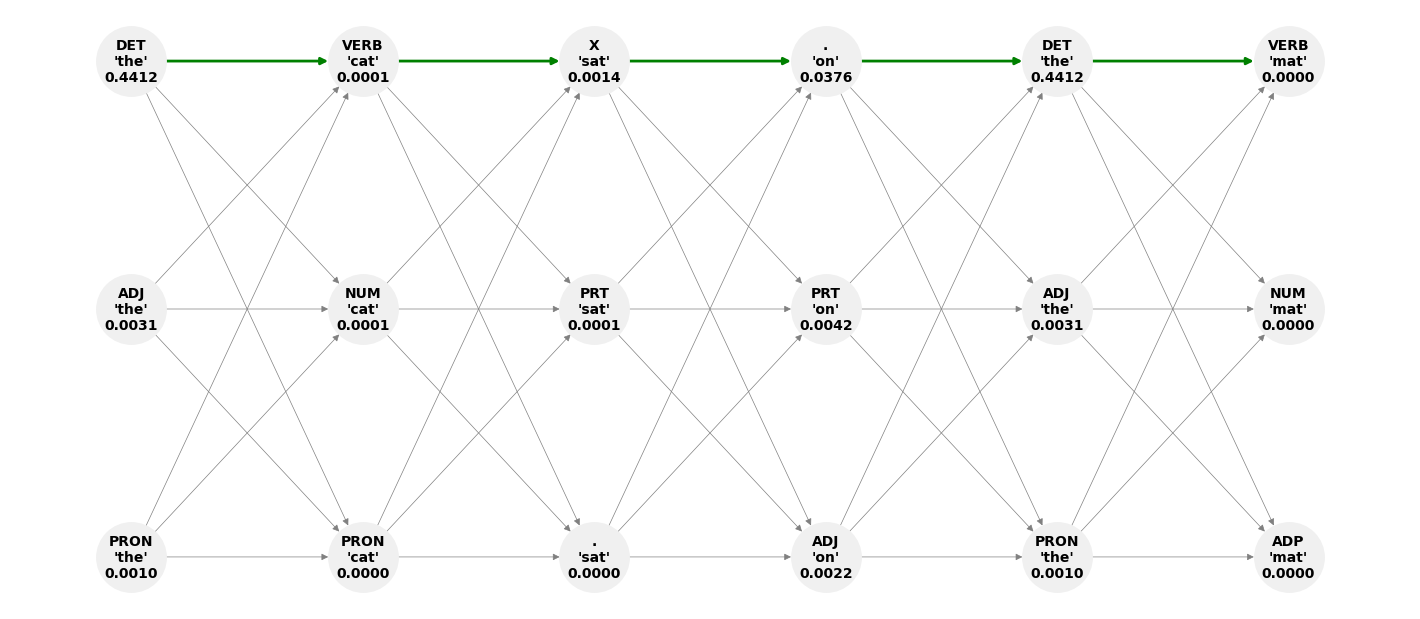

In [ ]:
def build_columnar_viterbi_graph(sentence, top_n=3):
    G = nx.DiGraph()
    
    tagged = tag_sentence(sentence)
    viterbi_tags = [tag for word, tag in tagged]
    
    node_positions = {}
    nodes_per_column = []
    
    for i, word in enumerate(sentence):
        top_tags = top_n_tags_with_probs(word, n=top_n)
        nodes = []
        for j, (tag, prob) in enumerate(top_tags):
            node_id = f"{i}_{tag}"
            G.add_node(node_id, label=f"{tag}\n'{word}'\n{prob:.4f}")
            node_positions[node_id] = (i, top_n - j)
            nodes.append(node_id)
        nodes_per_column.append(nodes)
    
    for col in range(len(nodes_per_column)-1):
        for src in nodes_per_column[col]:
            for tgt in nodes_per_column[col+1]:
                src_tag = src.split("_")[1]
                tgt_tag = tgt.split("_")[1]
                if src_tag == viterbi_tags[col] and tgt_tag == viterbi_tags[col+1]:
                    G.add_edge(src, tgt, color='green', weight=2)
                else:
                    G.add_edge(src, tgt, color='gray', weight=0.5)
    
    return G, node_positions, tagged

def plot_columnar_viterbi(G, node_positions):
    colors = [G[u][v]['color'] for u,v in G.edges()]
    weights = [G[u][v]['weight'] for u,v in G.edges()]
    
    plt.figure(figsize=(14,6))
    nx.draw(
        G, pos=node_positions, 
        with_labels=True,
        labels=nx.get_node_attributes(G, 'label'),
        node_size=2500, node_color="#f0f0f0",
        font_size=10, font_weight='bold',
        edge_color=colors, width=weights
    )
    plt.show()

sentence = "the cat sat on the mat"
words = sentence.split()
print("Words:", words)

tagged = tag_sentence(words)
print("\nViterbi Tagged Sentence:")
print(tagged)

G, node_positions, tagged = build_columnar_viterbi_graph(words, top_n=3)
plot_columnar_viterbi(G, node_positions)


In [ ]:
sentence = ["the", "cat", "sat", "on", "the", "mat"]

tagged = tag_sentence(sentence)
print("Viterbi Tagged Sentence:", tagged)

for word in sentence:
    top_tags = top_n_tags_with_probs(word, n=3)
    formatted = ", ".join([f"{tag} ({prob:.4f})" for tag, prob in top_tags])
    print(f"{word}: {formatted}")

Viterbi Tagged Sentence: [('the', 'DET'), ('cat', 'VERB'), ('sat', 'X'), ('on', '.'), ('the', 'DET'), ('mat', 'VERB')]
the: DET (0.4412), ADJ (0.0031), PRON (0.0010)
cat: VERB (0.0001), NUM (0.0001), PRON (0.0000)
sat: X (0.0014), PRT (0.0001), . (0.0000)
on: . (0.0376), PRT (0.0042), ADJ (0.0022)
the: DET (0.4412), ADJ (0.0031), PRON (0.0010)
mat: VERB (0.0000), NUM (0.0000), ADP (0.0000)
